In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from os import listdir
%matplotlib inline

In [86]:
testing_set = pd.read_csv('data/Testing_wells.csv')

In [87]:
for file in listdir('results'):
    try:
        result = pd.read_csv('results\%s'%file)
        testing_set['%s_team_NTG'%file.split('_')[0]] = result.NTG
    except:
        print('\n\n\n\n\n\n\n\n\nProblem with file %s\n\n\n\n\n\n\n\n\n\n\n\n\n'%file)

In [88]:
predictions = [column for column in testing_set.columns if 'team' in column]

AddHueToSatur_team_NTG
BaseLine_team_NTG
Columbarium_team_NTG
IharShulhan_team_NTG
Komanda_team_NTG
Trinity_team_NTG


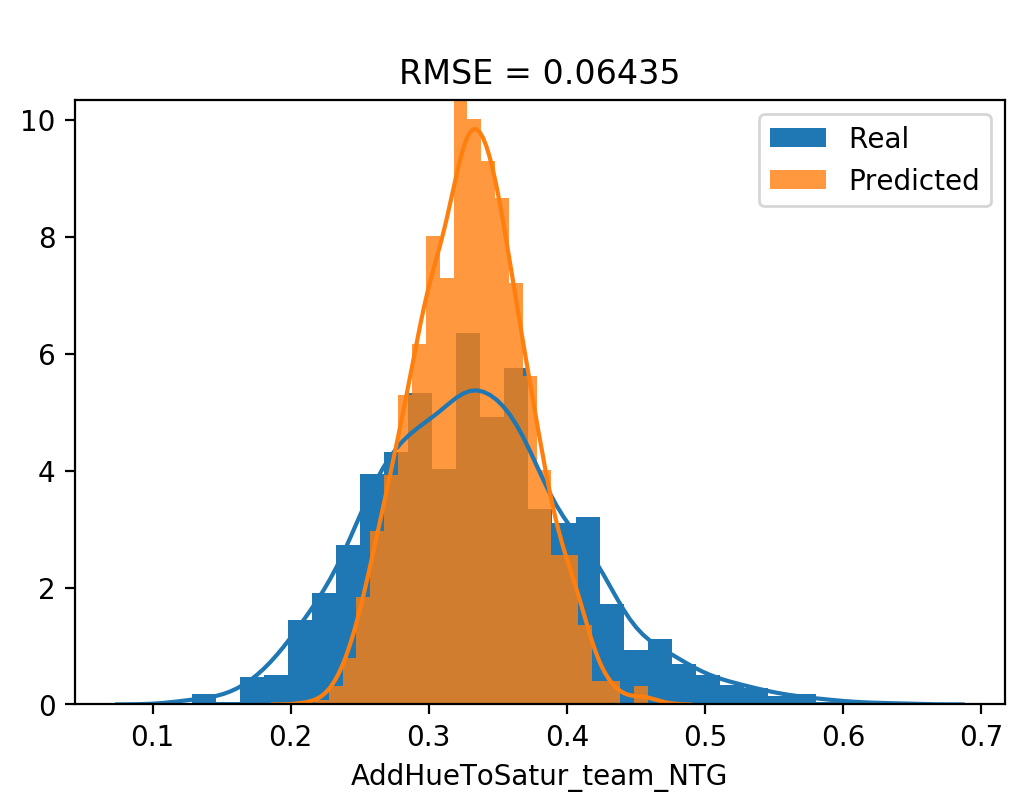

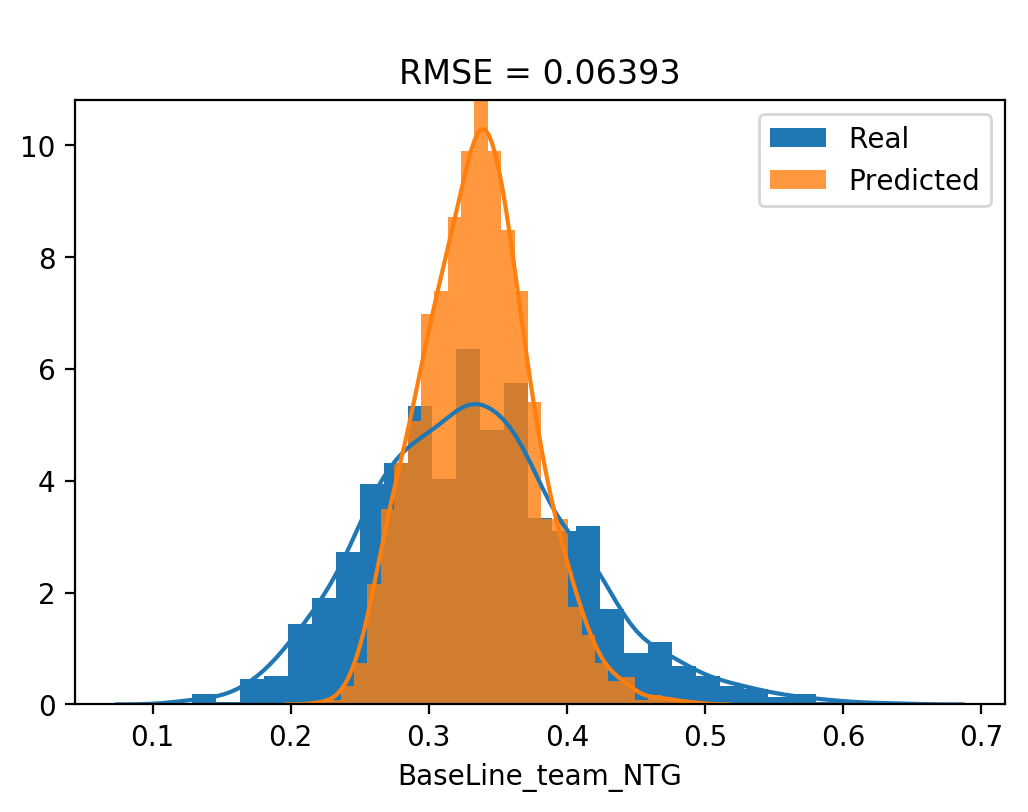

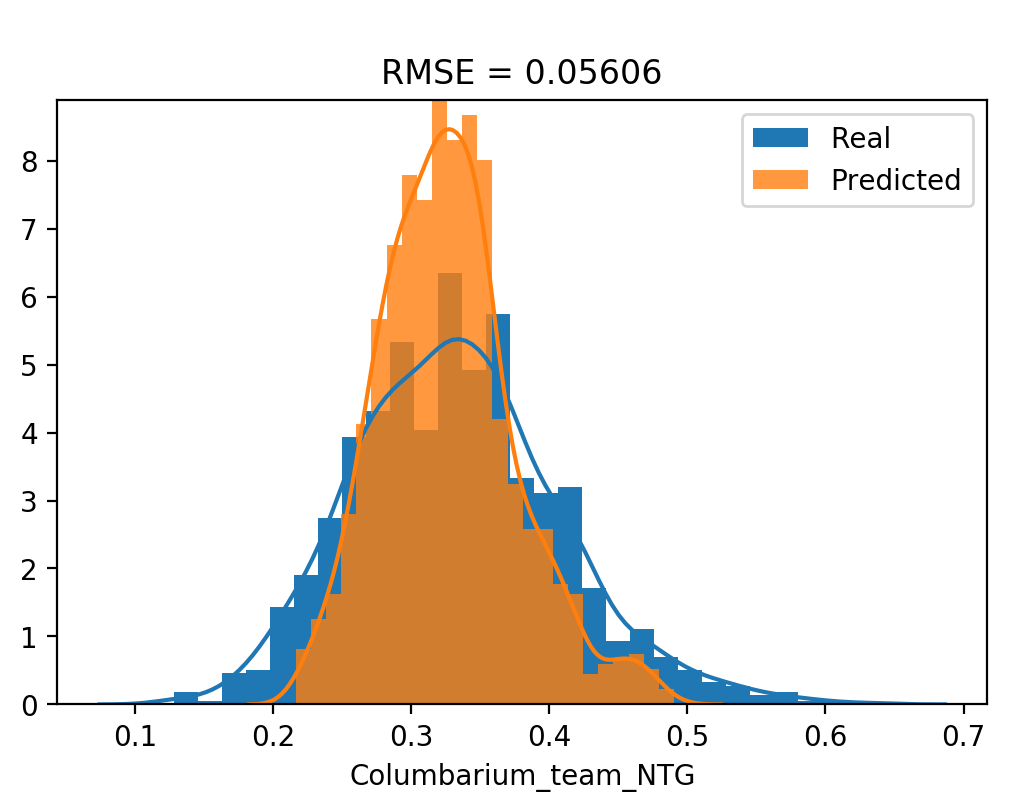

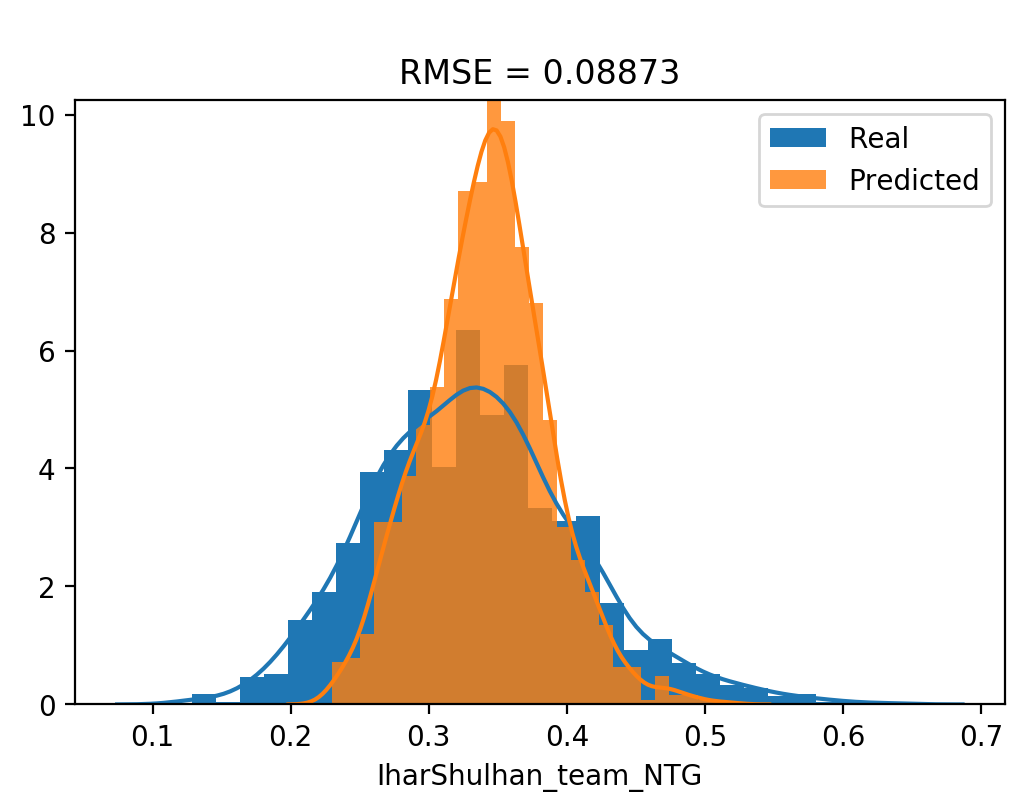

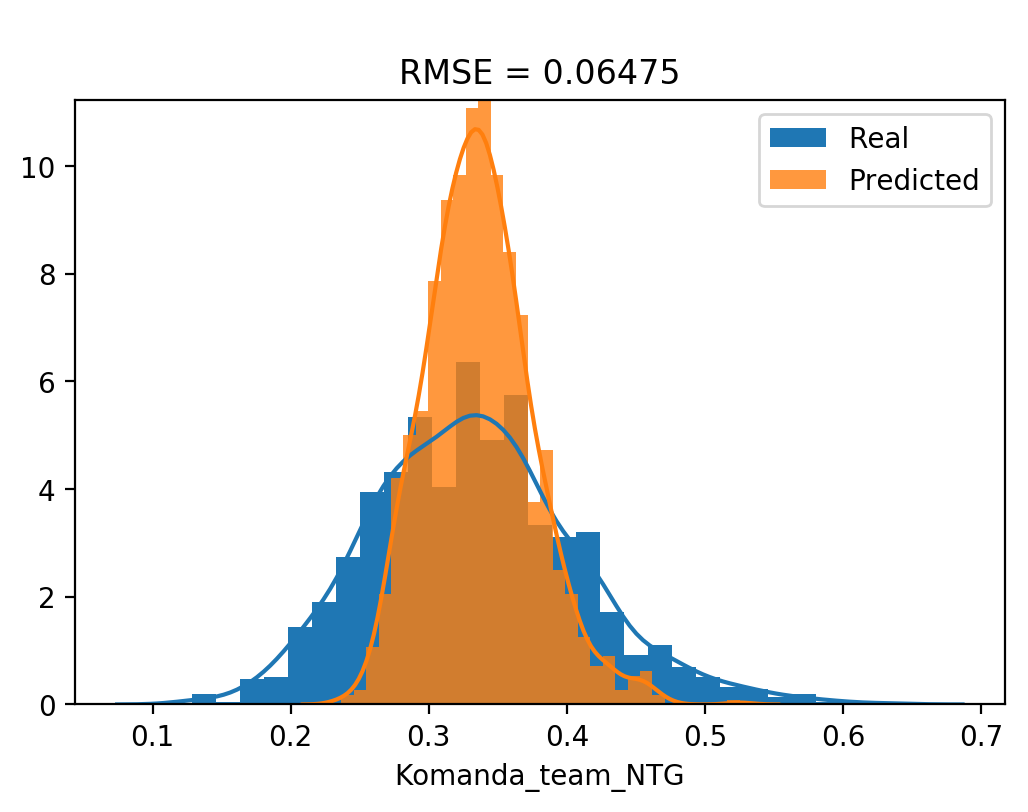

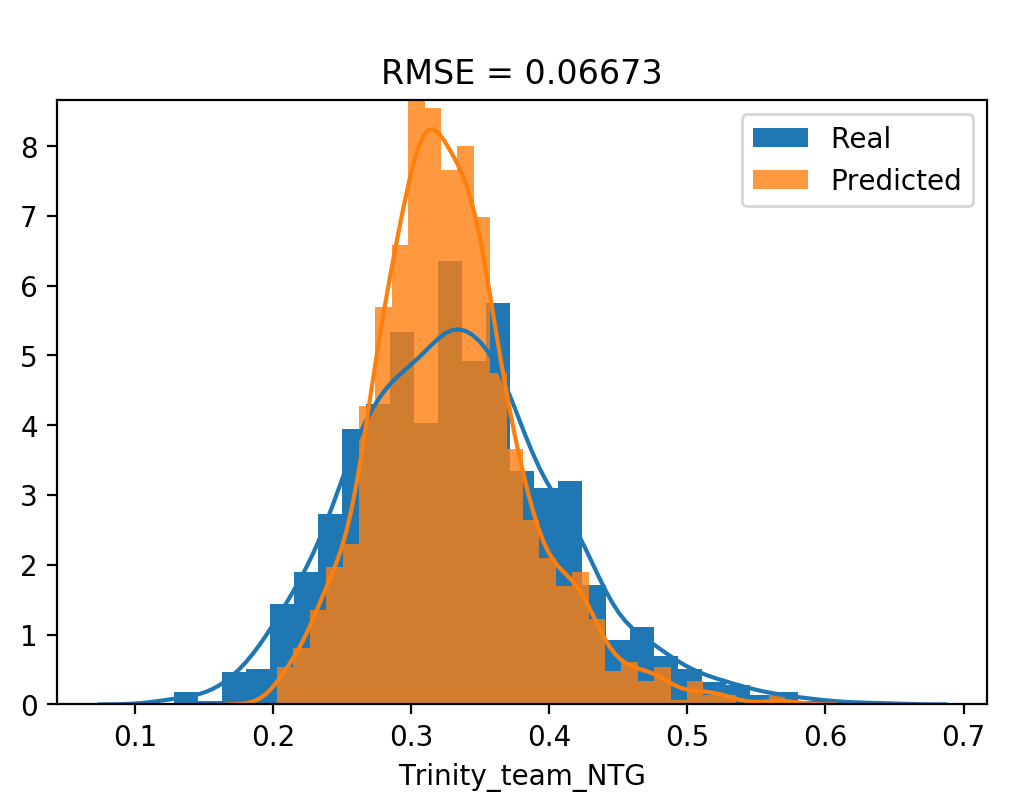

In [89]:
dict_rmse = {}
for prediction in predictions:
    try:
        print(prediction)
        plt.figure(dpi = 200)
        sns.distplot(testing_set.NTG, label='Real', hist_kws=dict(alpha = 1))
        sns.distplot(testing_set[prediction], label = 'Predicted', hist_kws=dict(alpha = 0.8))
        dict_rmse[prediction.split('-')[0]] = round(np.sqrt(mean_squared_error(
            testing_set.NTG, testing_set[prediction])), 5)
        plt.title('\nRMSE = %s'%dict_rmse[prediction.split('-')[0]])
        plt.legend()
    except:
        print('\n\n\n\n\n\n\n\n\nProblem with %s\n\n\n\n\n\n\n\n\n\n\n\n\n'%prediction)
plt.show()

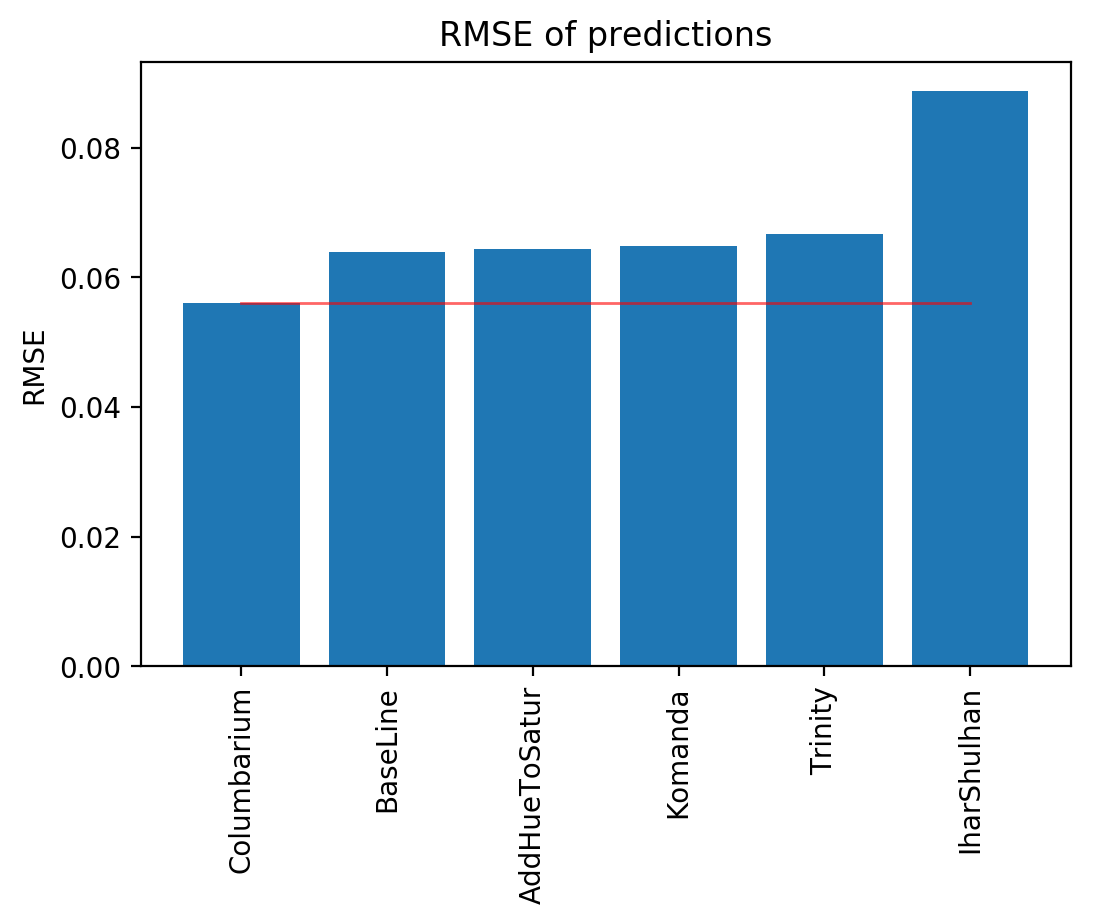

In [90]:
import operator
sorted_dict = sorted(dict_rmse.items(), key=operator.itemgetter(1))
plt.figure(dpi = 200)
plt.title('RMSE of predictions')
plt.bar(range(len(sorted_dict)), list(i[1] for i in sorted_dict), align='center')
plt.plot(range(len(sorted_dict)), [min([i[1] for i in sorted_dict]) for x in range(len(sorted_dict))], c = 'red',
        lw = 1, alpha = 0.6)
plt.xticks(range(len(sorted_dict)), list(i[0].split('_')[0] for i in sorted_dict), rotation = 90)
plt.ylabel('RMSE')
plt.show()

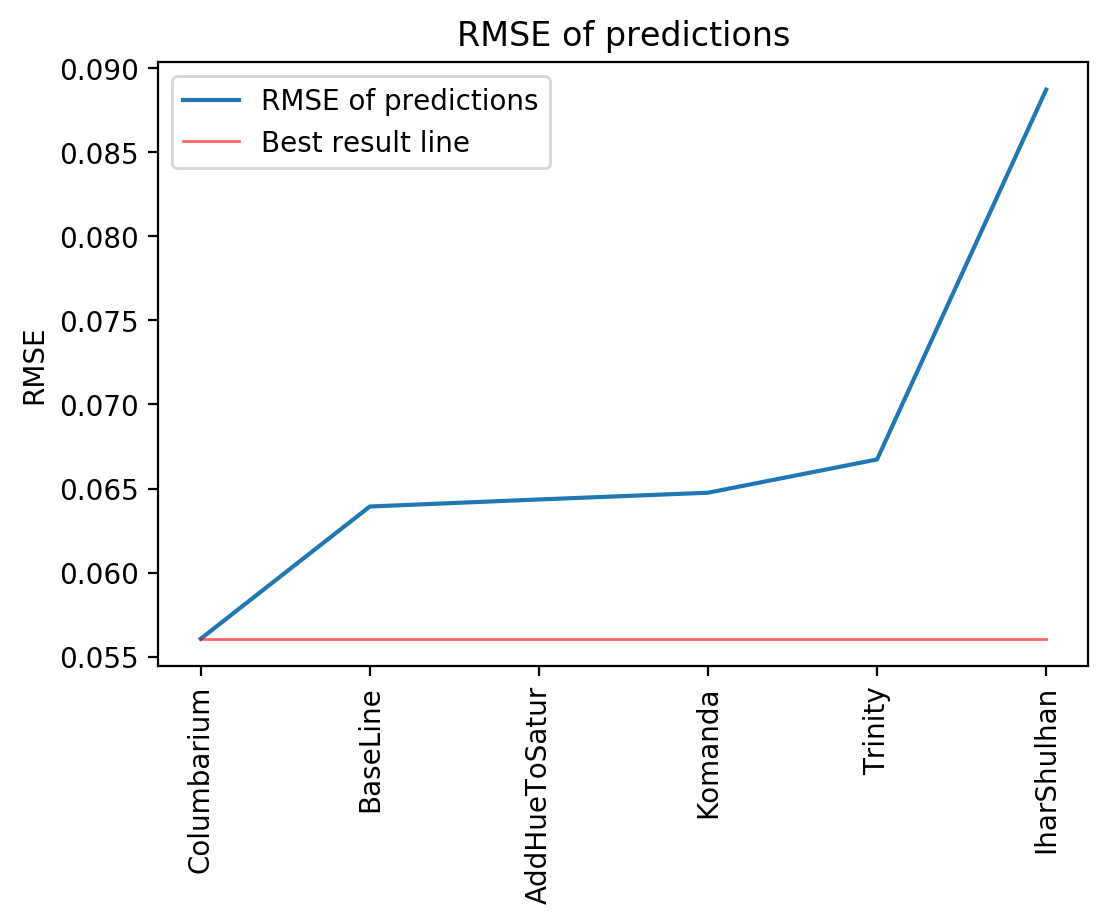

In [91]:
import operator
sorted_dict = sorted(dict_rmse.items(), key=operator.itemgetter(1))
plt.figure(dpi = 200)
plt.title('RMSE of predictions')
plt.plot(range(len(sorted_dict)), list(i[1] for i in sorted_dict), label = 'RMSE of predictions')
plt.plot(range(len(sorted_dict)), [min([i[1] for i in sorted_dict]) for x in range(len(sorted_dict))], c = 'red',
        lw = 1, alpha = 0.6, label = 'Best result line')
plt.xticks(range(len(sorted_dict)), list(i[0].split('_')[0] for i in sorted_dict), rotation = 90)
plt.ylabel('RMSE')
plt.legend()
plt.show()

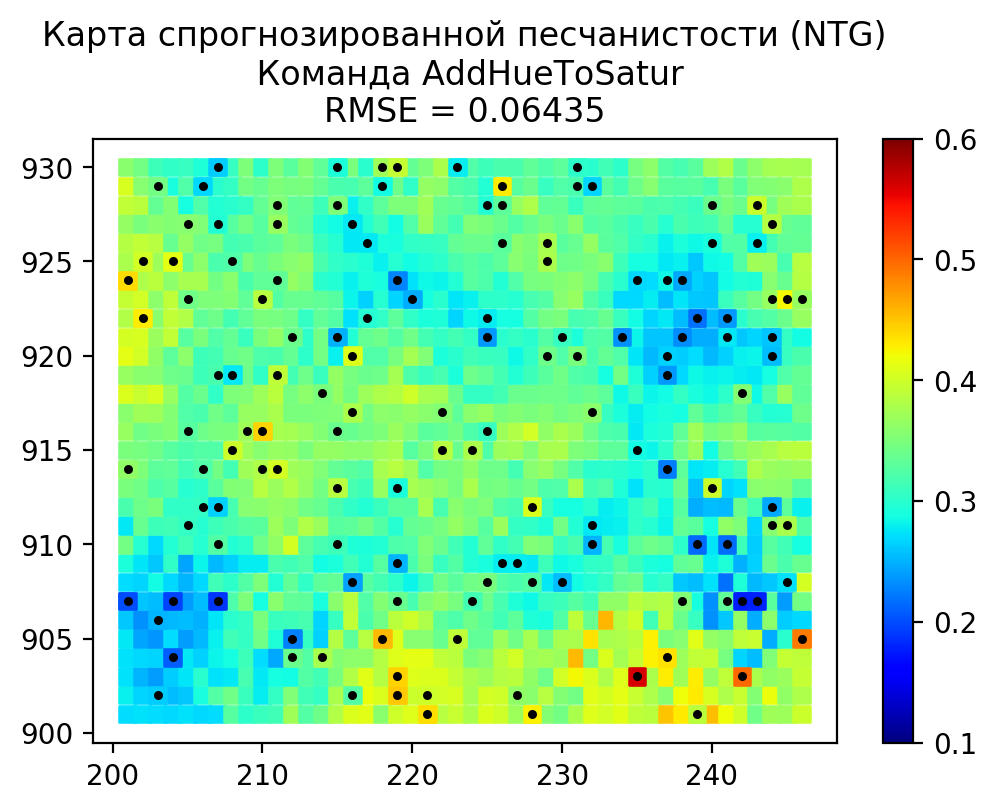

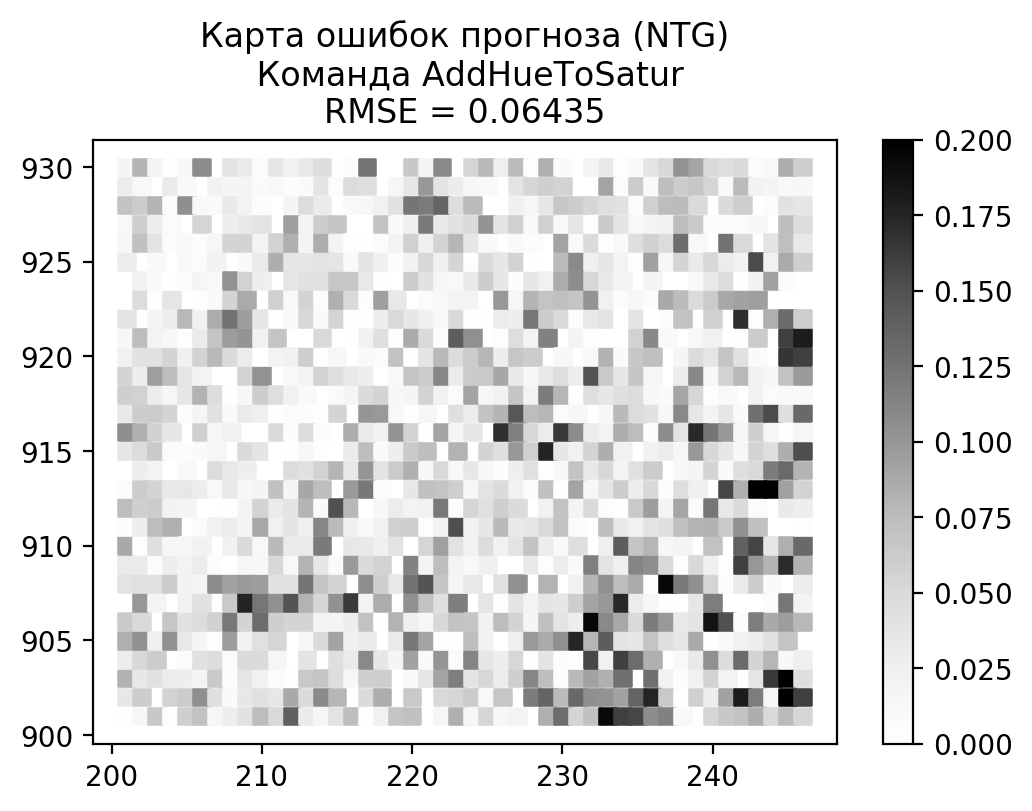

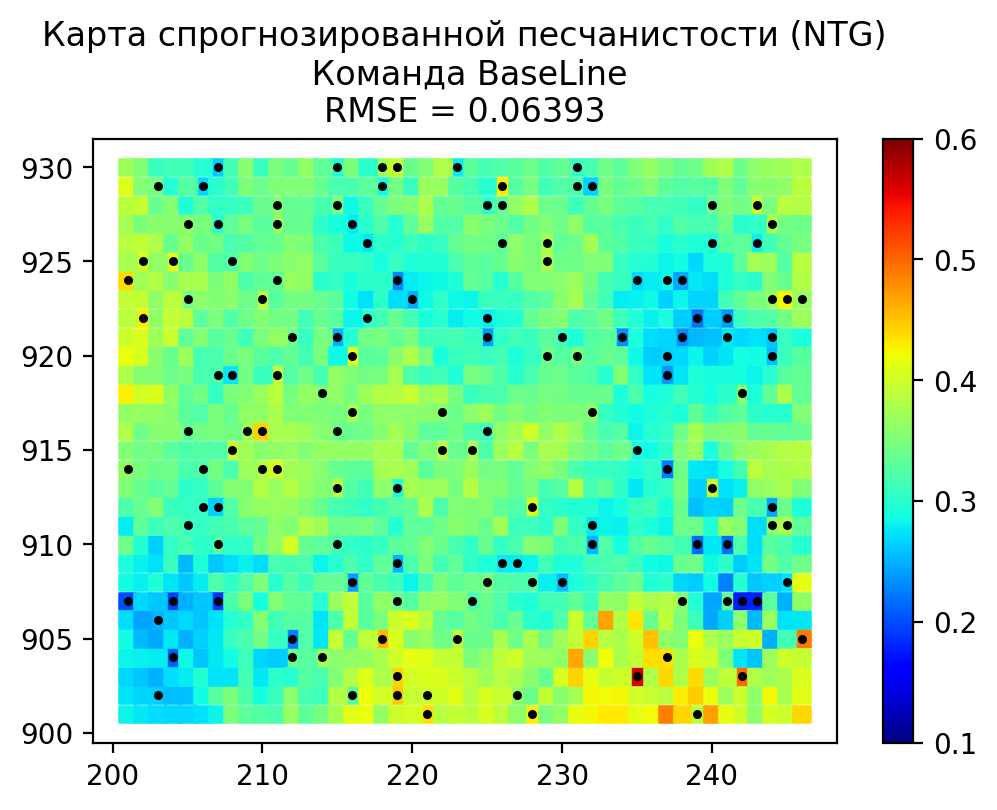

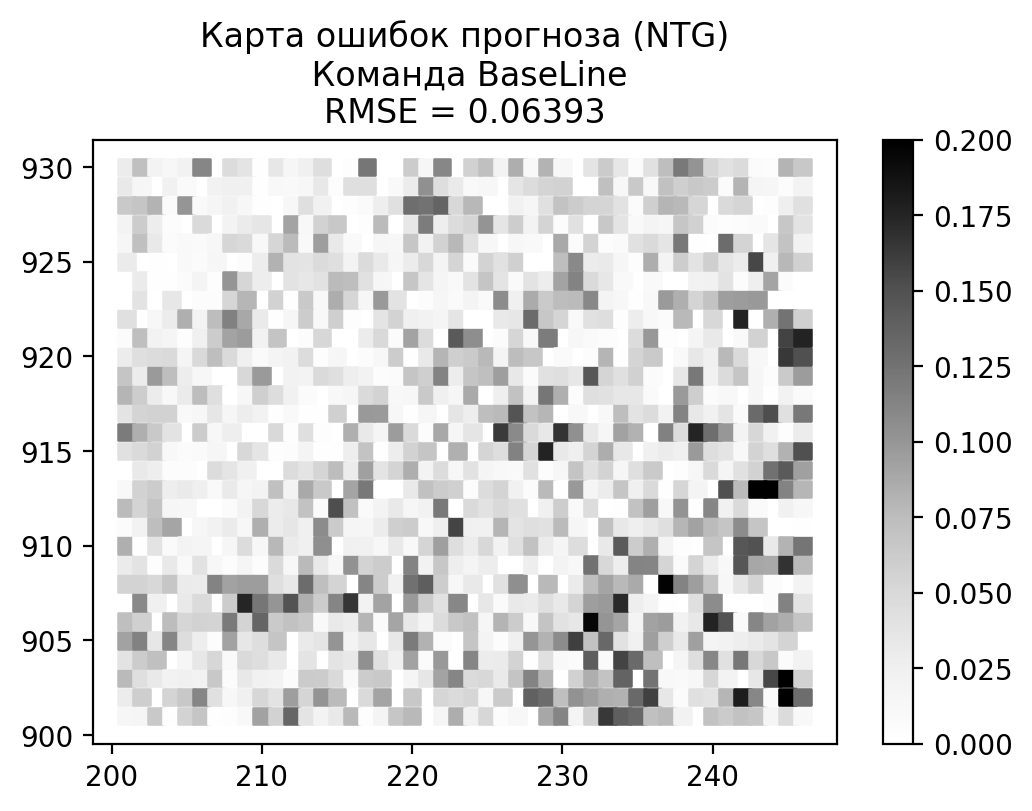

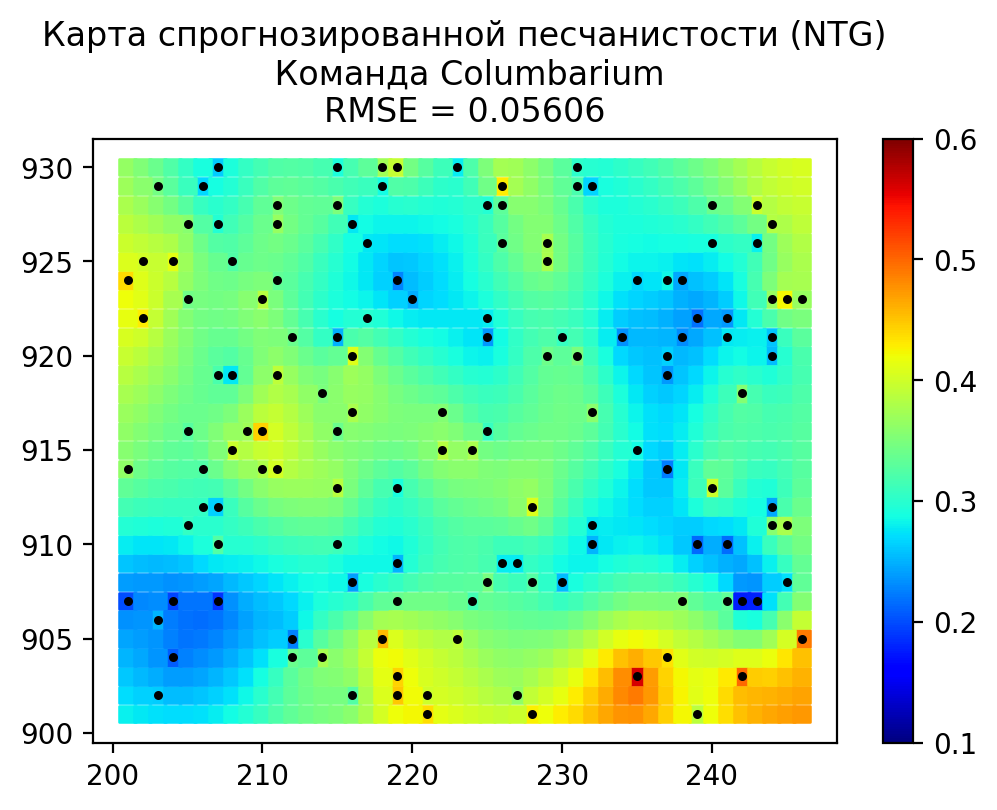

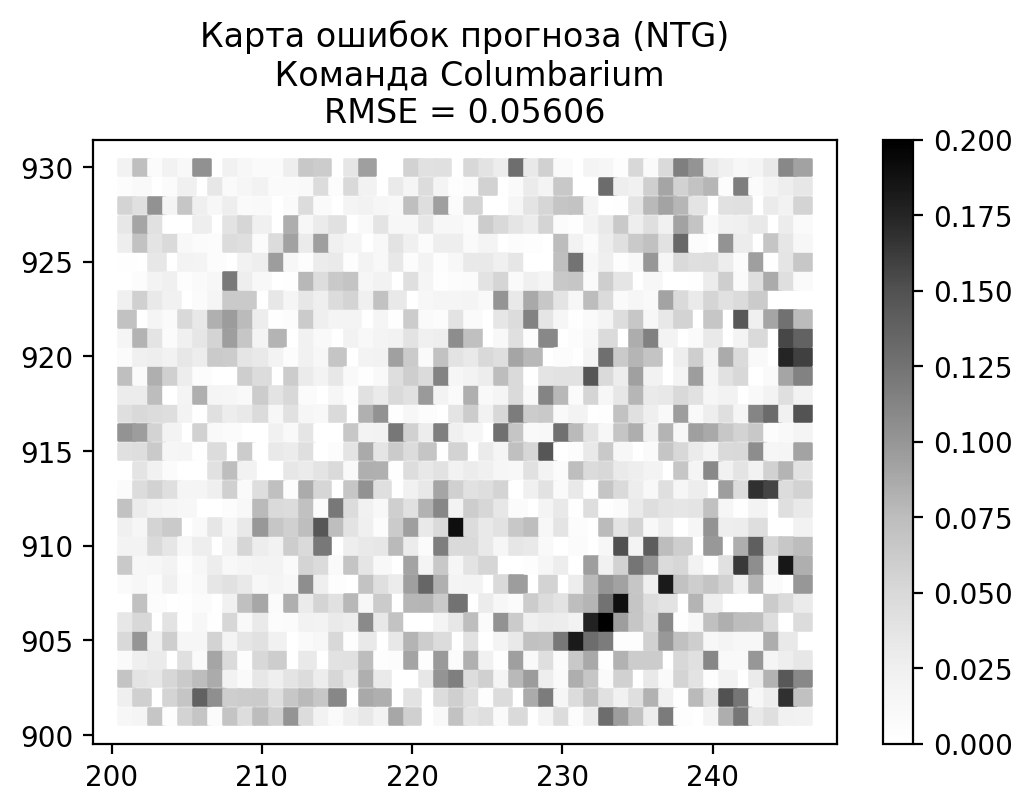

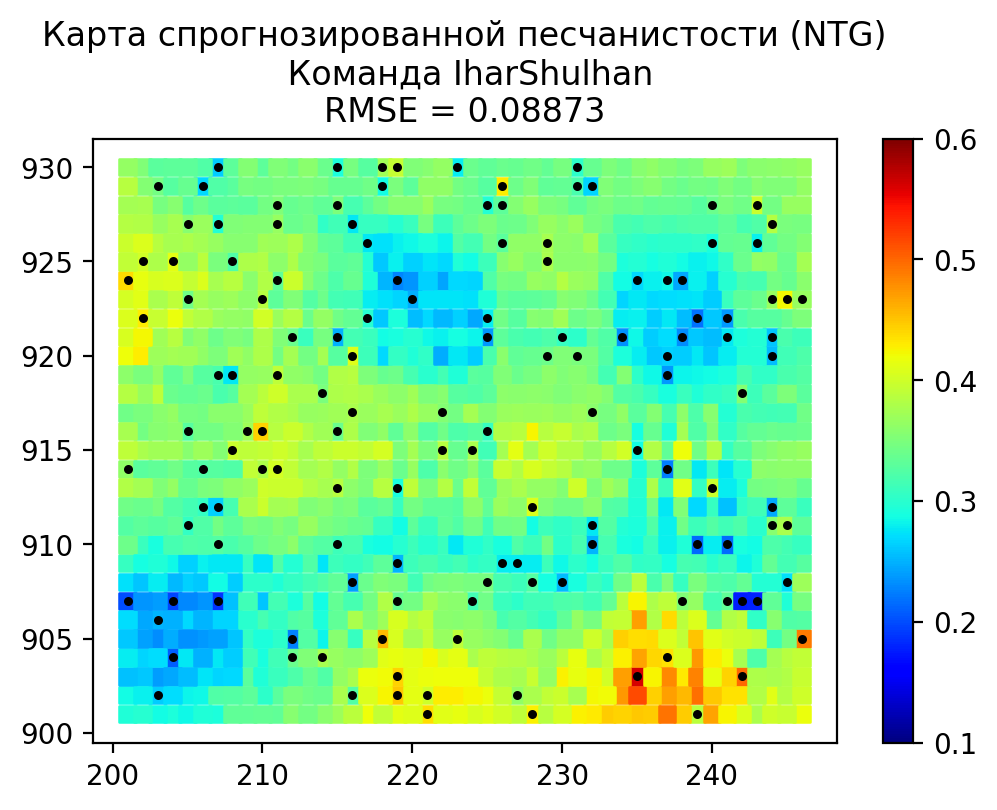

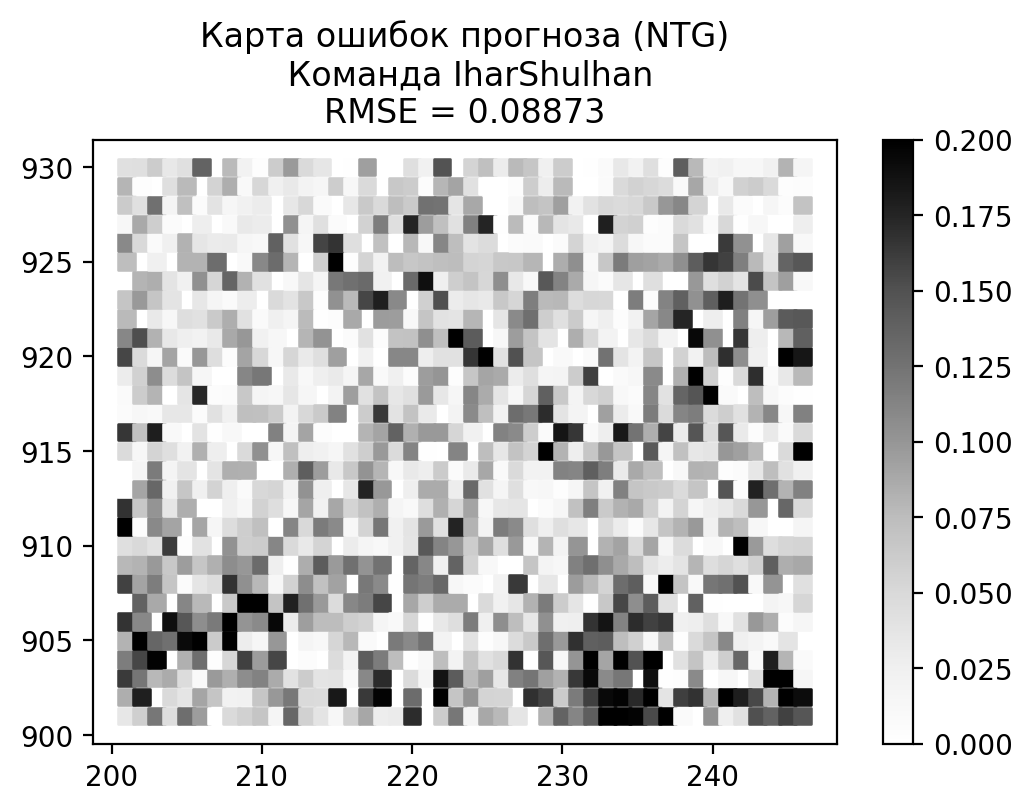

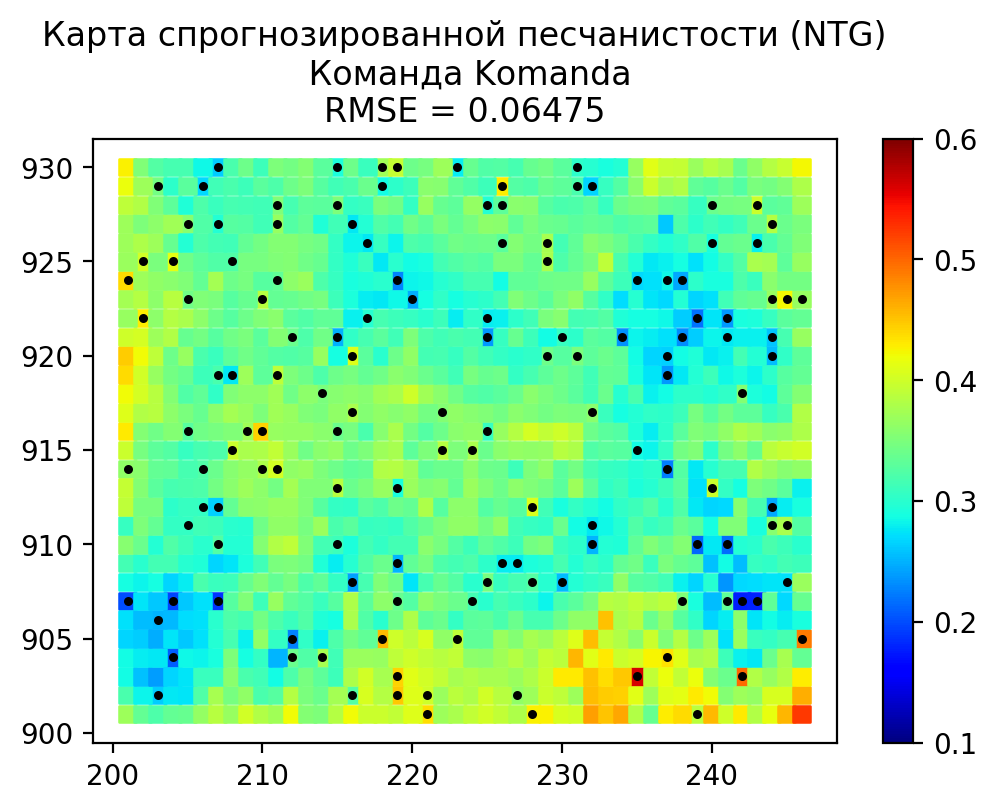

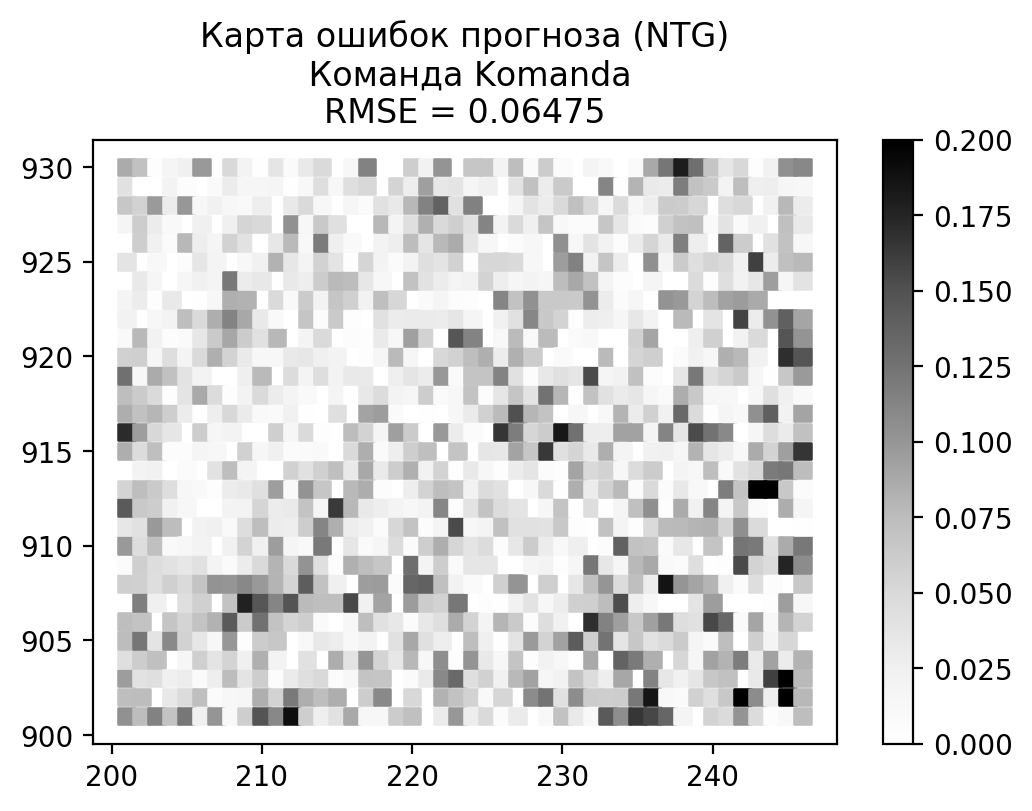

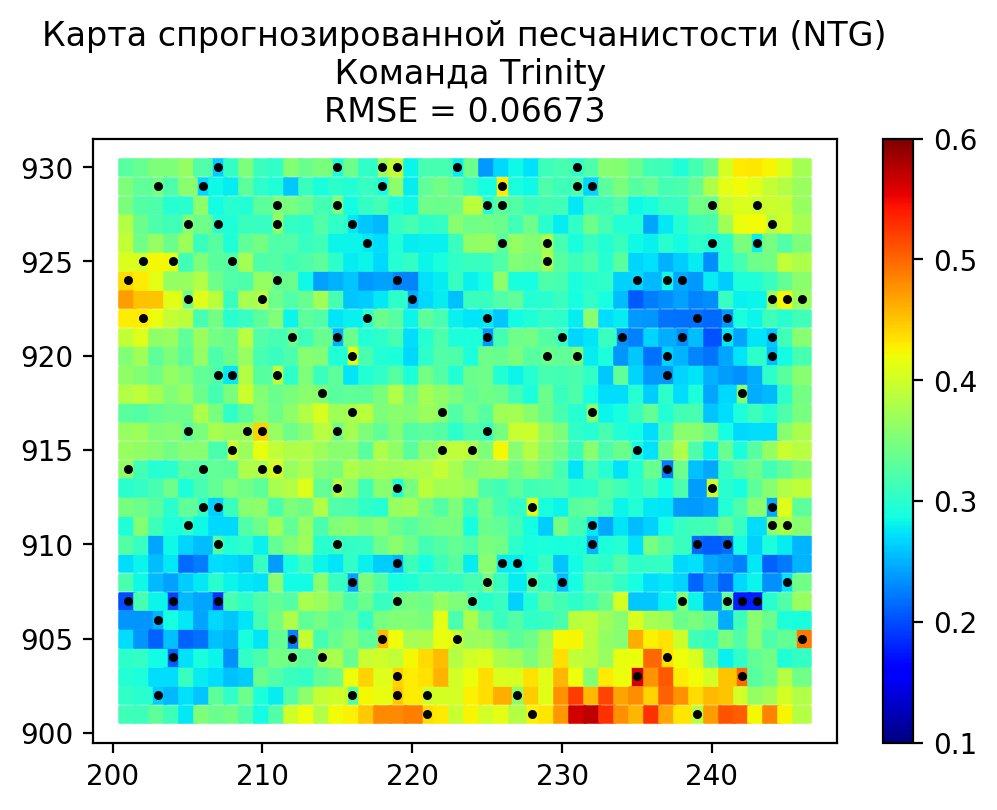

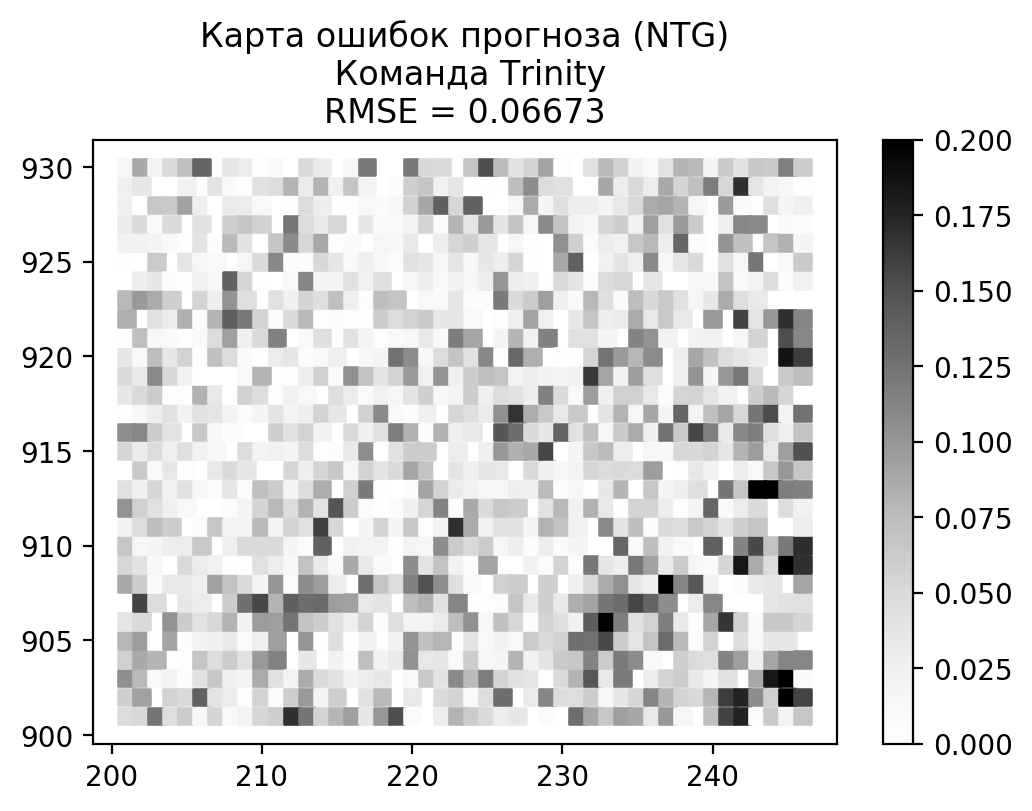

In [93]:
initial = pd.read_csv('data/Training_wells.csv')
concat_initial = initial.append(testing_set)
for file in listdir('results'):
    try:
        somesplit = file.split('_')[0]
        team_name = '%s_team_NTG'%somesplit
        empty = pd.read_csv('data/Empty_part.csv')
        team_result = pd.read_csv('results\%s'%file)
        empty['predicted_ntg'] = team_result['NTG']
        resulting_df = initial.append(team_result)
        plt.figure(dpi = 200)
        plt.title('Карта спрогнозированной песчанистости (NTG)\n Команда %s\nRMSE = %s'%(somesplit,
                                                                                         dict_rmse[team_name]))
        plt.scatter(resulting_df.X, resulting_df.Y, cmap = 'jet', c = resulting_df.NTG, marker='s', lw = 0.92,
                   vmin = 0.1, vmax = 0.6)
        plt.colorbar()
        plt.scatter(initial.X, initial.Y, cmap = 'jet', c = 'black', marker='o', s = 5)
        plt.show()
        plt.figure(dpi = 200)
        plt.title('Карта ошибок прогноза (NTG)\n Команда %s\nRMSE = %s'%(somesplit, dict_rmse[team_name]))
        plt.scatter(testing_set.X, testing_set.Y, cmap = 'Greys',
                    c = (np.sqrt((testing_set.NTG - testing_set[team_name])**2)), marker='s', lw = 0.92,
                   vmin = 0, vmax = 0.2)
        plt.colorbar()
        plt.show()
    except:
        print('\n\n\n\n\n\n\n\n\nProblem with file %s\n\n\n\n\n\n\n\n\n\n\n\n\n'%file)
plt.show()